In [1]:
import pandas as pd

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
sns.set()

In [4]:
mapreduce_local = pd.read_csv('./benchmarks/mapreduce_local.csv', index_col=0)
mapreduce_cluster = pd.read_csv('./benchmarks/mapreduce_cluster.csv', index_col=0)
hive_local = pd.read_csv('./benchmarks/hive_local.csv', index_col=0)
hive_cluster = pd.read_csv('./benchmarks/hive_cluster.csv', index_col=0)
spark_local = pd.read_csv('./benchmarks/spark_local.csv', index_col=0)
spark_cluster = pd.read_csv('./benchmarks/spark_cluster.csv', index_col=0)

In [5]:
mapreduce_local.name = 'MapReduce'
mapreduce_cluster.name = 'MapReduce'
hive_local.name = 'Hive'
hive_cluster.name = 'Hive'
spark_local.name = 'Spark'
spark_cluster.name = 'Spark'

In [6]:
local_datasets = [mapreduce_local, hive_local, spark_local]
cluster_datasets = [mapreduce_cluster, hive_cluster, spark_cluster]

In [7]:
def extract_job_n_data(dataset, job_n, str_tech):
    sequential = pd.melt(dataset.iloc[[job_n-1]])
    sequential = sequential.apply(pd.to_numeric)
    sequential['tech'] = str_tech
    return sequential

In [8]:
def concatenate_single_job_data(sequential_datasets):
    return pd.concat([f_mr1_local, f_h1_local, f_s1_local])

In [9]:
for job_n in range(0,3):
    job_data = []
    for dataset in local_datasets:
        job_data.append(extract_job_n_data(dataset, job_n, dataset.name))
    job_data_concat = pd.concat(job_data)
    job_data_concat.to_csv('./benchmarks/job' + str(job_n+1) + '_data.csv')

In [10]:
mr_1 = pd.melt(mapreduce_local.iloc[[0]])
f_mr1_local = mr_1.apply(pd.to_numeric)
f_mr1_local['tech'] = 'Mapreduce'
f_mr1_local

,variable,value,tech
0,239.75,0.948,Mapreduce
1,479.51,1.679,Mapreduce
2,959.03,2.915,Mapreduce
3,1909.97,5.488,Mapreduce
4,3835.92,10.654,Mapreduce


In [11]:
h_1 = pd.melt(hive_local.iloc[[0]])
f_h1_local = h_1.apply(pd.to_numeric)
f_h1_local['tech'] = 'Hive'
f_h1_local

,variable,value,tech
0,239.75,1.483,Hive
1,479.51,2.133,Hive
2,959.03,4.533,Hive
3,1909.97,4.550,Hive
4,3835.92,NaN,Hive


In [12]:
s_1 = pd.melt(spark_local.iloc[[0]])
f_s1_local = s_1.apply(pd.to_numeric)
f_s1_local['tech'] = 'Spark'
f_s1_local

,variable,value,tech
0,239.75,1.443,Spark
1,479.51,2.355,Spark
2,959.03,4.691,Spark
3,1909.97,9.149,Spark
4,3835.92,18.967,Spark


In [13]:
job1_data = pd.concat([f_mr1_local, f_h1_local, f_s1_local])

In [14]:
job1_data = pd.read_csv('./benchmarks/job1_data.csv')
job2_data = pd.read_csv('./benchmarks/job2_data.csv')
job3_data = pd.read_csv('./benchmarks/job3_data.csv')

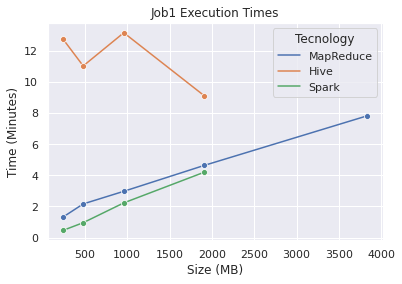

In [15]:
fig = sns.lineplot(x='variable', y='value', hue='tech', data=job1_data, marker="o")
plt.xlabel("Size (MB)")
plt.ylabel("Time (Minutes)")
plt.title("Job1 Execution Times")
fig.legend(title='Tecnology')
plt.show(fig)

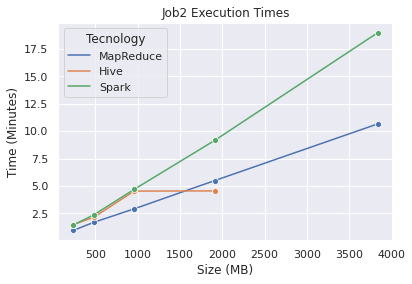

In [16]:
fig = sns.lineplot(x='variable', y='value', hue='tech', data=job2_data, marker="o")
plt.xlabel("Size (MB)")
plt.ylabel("Time (Minutes)")
plt.title("Job2 Execution Times")
fig.legend(title='Tecnology')
plt.show(fig)

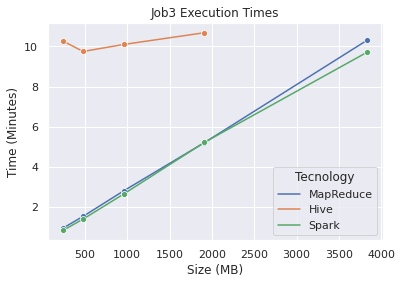

In [17]:
fig = sns.lineplot(x='variable', y='value', hue='tech', data=job3_data, marker="o")
plt.xlabel("Size (MB)")
plt.ylabel("Time (Minutes)")
plt.title("Job3 Execution Times")
fig.legend(title='Tecnology')
plt.show(fig)